# NBA Project: Feature Engineering

Notebook by Ryan Ahmed

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Feature Engineering

In [206]:
train_data = pd.read_csv('datasets/train_data_original.csv')
train_data.head()

,Team,Rk_OFF,G_OFF,MP_OFF,FG_OFF,FGA_OFF,FG%_OFF,3P_OFF,3PA_OFF,3P%_OFF,...,ORB_DEF,DRB_DEF,TRB_DEF,AST_DEF,STL_DEF,BLK_DEF,TOV_DEF,PF_DEF,PTS_DEF,WON_MORE_THAN_HALF
0,Atlanta Hawks,16.0,67,243.0,40.6,90.6,0.449,12.0,36.1,0.333,...,11.2,35.9,47.0,25.0,9.0,6.4,15.0,21.0,119.7,0
1,Boston Celtics*,9.0,72,242.1,41.3,89.6,0.461,12.6,34.5,0.364,...,10.3,34.0,44.3,22.4,7.1,5.5,15.2,20.7,107.3,1
2,Brooklyn Nets*,17.0,72,242.8,40.4,90.3,0.448,13.1,38.1,0.343,...,10.6,35.3,45.9,22.6,7.7,5.3,12.8,21.1,112.3,0
3,Charlotte Hornets,30.0,65,242.3,37.3,85.9,0.434,12.1,34.3,0.352,...,10.9,35.0,46.0,26.6,8.0,5.0,14.4,20.6,109.6,0
4,Chicago Bulls,27.0,65,241.2,39.6,88.6,0.447,12.2,35.1,0.348,...,10.2,35.4,45.5,25.4,8.2,5.9,18.3,19.2,109.9,0


In [186]:
test_data = pd.read_csv('datasets/test_data_original.csv')
test_data.head()

,Team,Rk_OFF,G_OFF,MP_OFF,FG_OFF,FGA_OFF,FG%_OFF,3P_OFF,3PA_OFF,3P%_OFF,...,ORB_DEF,DRB_DEF,TRB_DEF,AST_DEF,STL_DEF,BLK_DEF,TOV_DEF,PF_DEF,PTS_DEF,WON_MORE_THAN_HALF
0,Atlanta Hawks*,6.0,82,240.3,41.5,88.3,0.470,12.9,34.4,0.374,...,10.2,33.6,43.9,25.4,7.0,4.5,12.8,20.3,112.4,1
1,Boston Celtics*,12.0,82,242.7,40.7,87.4,0.466,13.2,37.1,0.356,...,10.5,33.3,43.7,21.6,7.5,4.6,13.8,19.4,104.5,1
2,Brooklyn Nets*,9.0,82,240.9,42.0,88.4,0.475,11.5,31.7,0.361,...,11.3,32.8,44.1,23.8,7.9,4.9,13.3,19.7,112.1,1
3,Charlotte Hornets,4.0,82,242.4,42.8,91.4,0.468,13.9,38.2,0.365,...,11.4,35.6,47.0,26.5,7.5,4.6,15.0,19.6,114.9,1
4,Chicago Bulls*,13.0,82,240.6,41.7,86.9,0.480,10.6,28.8,0.369,...,9.3,33.9,43.2,25.0,7.1,5.0,13.1,18.2,112.0,1


In [187]:
train_data.describe()

,Rk_OFF,G_OFF,MP_OFF,FG_OFF,FGA_OFF,FG%_OFF,3P_OFF,3PA_OFF,3P%_OFF,2P_OFF,...,ORB_DEF,DRB_DEF,TRB_DEF,AST_DEF,STL_DEF,BLK_DEF,TOV_DEF,PF_DEF,PTS_DEF,WON_MORE_THAN_HALF
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,15.500000,71.300000,241.600000,41.025000,88.610000,0.462983,12.450000,34.370000,0.361900,28.576667,...,9.965000,34.6150,44.571667,24.611667,7.613333,4.885000,14.196667,20.031667,111.966667,0.433333
std,8.728484,2.437698,0.833819,1.528778,1.961727,0.014234,1.575824,3.831506,0.016833,2.045281,...,0.663536,1.4422,1.834979,1.230694,0.653664,0.645933,1.317158,1.302344,3.569725,0.499717
min,1.000000,64.000000,240.000000,37.300000,83.700000,0.429000,9.600000,28.000000,0.333000,24.500000,...,8.600000,32.0000,41.200000,21.500000,6.100000,3.600000,11.500000,17.700000,104.700000,0.000000
25%,8.000000,72.000000,241.000000,39.975000,87.675000,0.451750,11.175000,31.575000,0.349000,27.100000,...,9.500000,33.3000,42.900000,23.775000,7.175000,4.500000,13.175000,19.075000,109.025000,0.000000
50%,15.500000,72.000000,241.700000,41.150000,88.600000,0.466000,12.350000,34.150000,0.363500,28.600000,...,10.000000,34.5500,44.800000,24.750000,7.600000,4.850000,14.150000,20.000000,111.900000,0.000000
75%,23.000000,72.000000,242.100000,42.200000,90.325000,0.472250,13.600000,36.925000,0.374000,30.150000,...,10.400000,35.7250,45.925000,25.450000,8.000000,5.300000,15.025000,21.000000,114.800000,1.000000
max,30.000000,75.000000,243.100000,44.700000,91.800000,0.494000,16.700000,45.300000,0.411000,33.000000,...,11.500000,37.7000,47.900000,27.100000,9.400000,6.400000,18.300000,22.900000,119.700000,1.000000


All features appear normal. Let's plot their distributions.

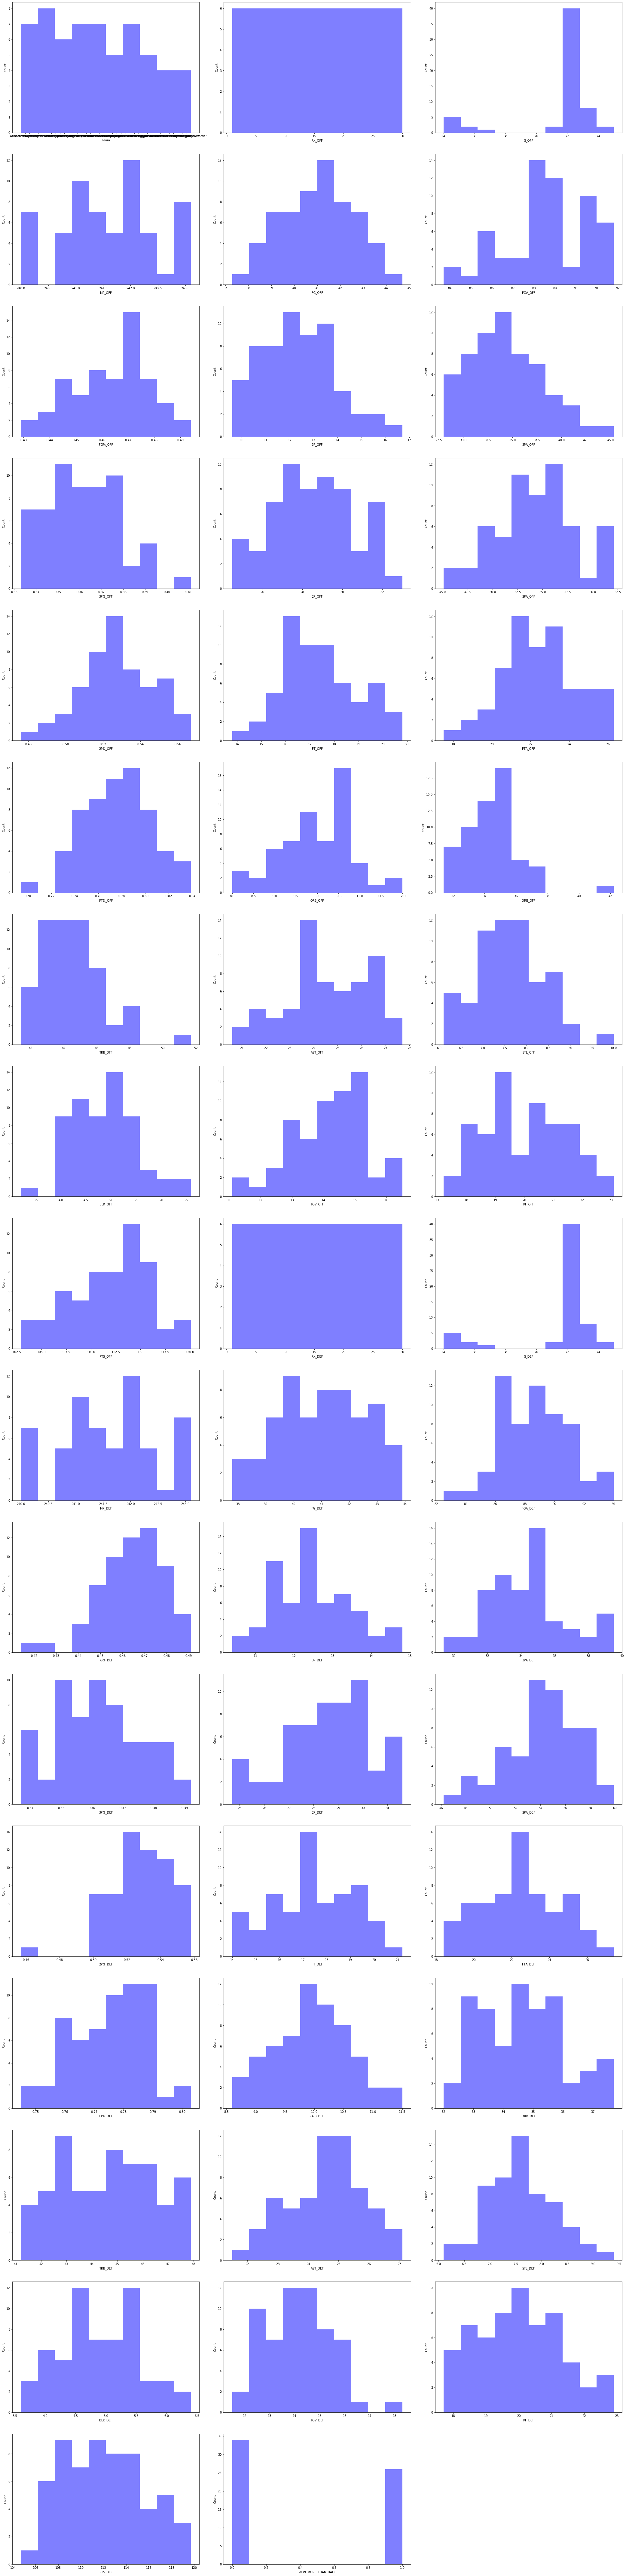

In [203]:
ncols = 3
nrows = int(np.ceil(len(train_data.columns) / (1.0 * ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 120))

fig.tight_layout(pad=5.0)
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(train_data.columns):
            ax.hist(train_data[train_data.columns[counter]], bins=10, color='blue', alpha=0.5)
            ax.set_xlabel(train_data.columns[counter])
            ax.set_ylabel('Count')
        else:
            ax.set_axis_off()
        
        counter += 1

Distributions appear normal except for the target variable, team, rank, G_OFF, and G_DEF features, which are expected. 

The reason why G_OFF and G_DEF appears the way they do is because they represent the number of games played on the offense side or defense side. In the 2019-2020 season, there were fewer games than normal, which explains the outliers on the low side.

In [175]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team                60 non-null     object 
 1   Rk_OFF              60 non-null     float64
 2   G_OFF               60 non-null     int64  
 3   MP_OFF              60 non-null     float64
 4   FG_OFF              60 non-null     float64
 5   FGA_OFF             60 non-null     float64
 6   FG%_OFF             60 non-null     float64
 7   3P_OFF              60 non-null     float64
 8   3PA_OFF             60 non-null     float64
 9   3P%_OFF             60 non-null     float64
 10  2P_OFF              60 non-null     float64
 11  2PA_OFF             60 non-null     float64
 12  2P%_OFF             60 non-null     float64
 13  FT_OFF              60 non-null     float64
 14  FTA_OFF             60 non-null     float64
 15  FT%_OFF             60 non-null     float64
 16  ORB_OFF   

There are no missing values.

In [176]:
train_data.shape

(60, 50)

In [177]:
train_data.dtypes

Team                   object
Rk_OFF                float64
G_OFF                   int64
MP_OFF                float64
FG_OFF                float64
FGA_OFF               float64
FG%_OFF               float64
3P_OFF                float64
3PA_OFF               float64
3P%_OFF               float64
2P_OFF                float64
2PA_OFF               float64
2P%_OFF               float64
FT_OFF                float64
FTA_OFF               float64
FT%_OFF               float64
ORB_OFF               float64
DRB_OFF               float64
TRB_OFF               float64
AST_OFF               float64
STL_OFF               float64
BLK_OFF               float64
TOV_OFF               float64
PF_OFF                float64
PTS_OFF               float64
Rk_DEF                float64
G_DEF                   int64
MP_DEF                float64
FG_DEF                float64
FGA_DEF               float64
FG%_DEF               float64
3P_DEF                float64
3PA_DEF               float64
3P%_DEF   

In [148]:
train_data.columns

Index(['Team', 'Rk_OFF', 'G_OFF', 'MP_OFF', 'FG_OFF', 'FGA_OFF', 'FG%_OFF',
       '3P_OFF', '3PA_OFF', '3P%_OFF', '2P_OFF', '2PA_OFF', '2P%_OFF',
       'FT_OFF', 'FTA_OFF', 'FT%_OFF', 'ORB_OFF', 'DRB_OFF', 'TRB_OFF',
       'AST_OFF', 'STL_OFF', 'BLK_OFF', 'TOV_OFF', 'PF_OFF', 'PTS_OFF',
       'Rk_DEF', 'G_DEF', 'MP_DEF', 'FG_DEF', 'FGA_DEF', 'FG%_DEF', '3P_DEF',
       '3PA_DEF', '3P%_DEF', '2P_DEF', '2PA_DEF', '2P%_DEF', 'FT_DEF',
       'FTA_DEF', 'FT%_DEF', 'ORB_DEF', 'DRB_DEF', 'TRB_DEF', 'AST_DEF',
       'STL_DEF', 'BLK_DEF', 'TOV_DEF', 'PF_DEF', 'PTS_DEF',
       'WON_MORE_THAN_HALF'],
      dtype='object')

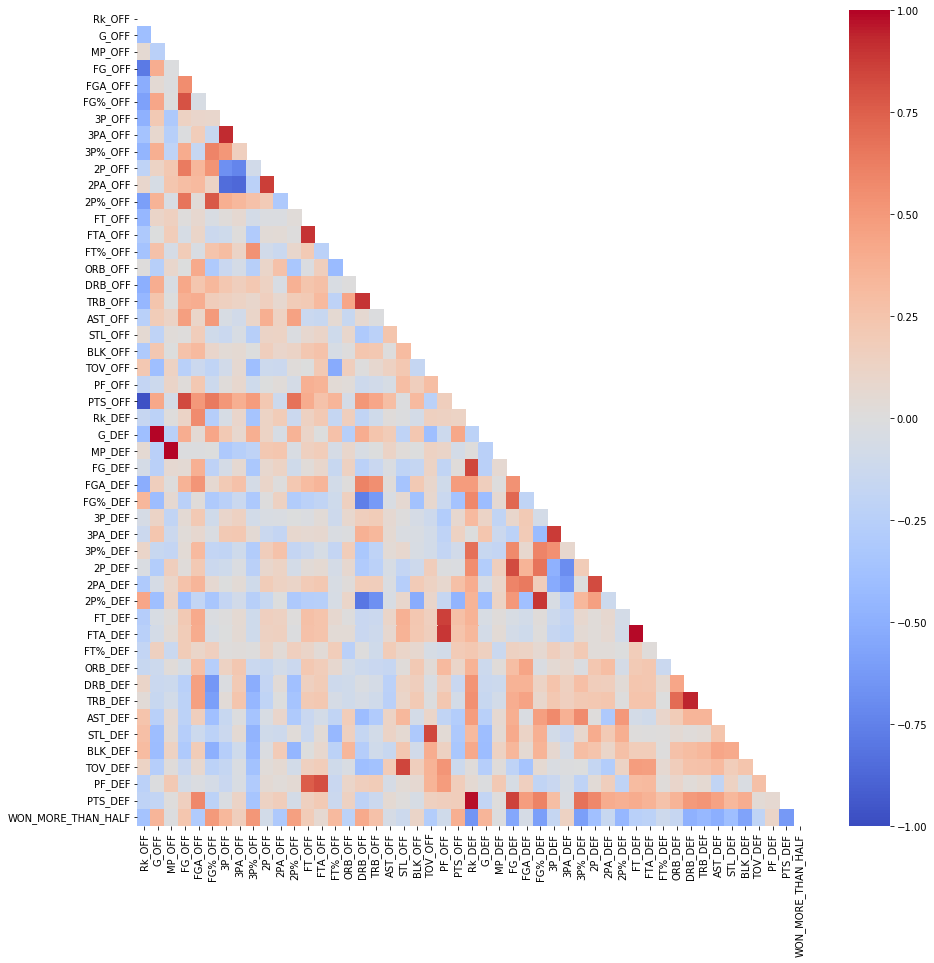

In [149]:
# Generate correlation matrix heat map
fig, ax = plt.subplots(figsize=(15, 15))
matrix = np.triu(train_data.corr())
sns.heatmap(train_data.corr(), annot=False, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)

In [150]:
# THIS FUNCTION RETURNS ALL THE HIGHLY CORRELATED PAIRS IN THE FEATURES GIVEN A THRESHOLD
def get_high_correlations(data, threshold=0.75):
    highly_corr = []
    corr_matrix = data.corr()
    for i in range(len(data.columns)):
        for j in range(i+1, len(data.columns)):
            col1 = data.columns[i]
            col2 = data.columns[j]
            corr_value = corr_matrix[col1][col2]
            if abs(corr_value) > threshold:
                highly_corr.append((col1, col2))
                print(col1+' is highly correlated to '+col2)
    return highly_corr

In [151]:
corr = get_high_correlations(X_train)

Rk_OFF is highly correlated to FG_OFF
Rk_OFF is highly correlated to PTS_OFF
G_OFF is highly correlated to G_DEF
MP_OFF is highly correlated to MP_DEF
FG_OFF is highly correlated to FG%_OFF
FG_OFF is highly correlated to PTS_OFF
FG%_OFF is highly correlated to 2P%_OFF
3P_OFF is highly correlated to 3PA_OFF
3P_OFF is highly correlated to 2PA_OFF
3PA_OFF is highly correlated to 2PA_OFF
2P_OFF is highly correlated to 2PA_OFF
FT_OFF is highly correlated to FTA_OFF
FT_OFF is highly correlated to PF_DEF
FTA_OFF is highly correlated to PF_DEF
DRB_OFF is highly correlated to TRB_OFF
DRB_OFF is highly correlated to FG%_DEF
DRB_OFF is highly correlated to 2P%_DEF
STL_OFF is highly correlated to TOV_DEF
TOV_OFF is highly correlated to STL_DEF
PF_OFF is highly correlated to FT_DEF
PF_OFF is highly correlated to FTA_DEF
Rk_DEF is highly correlated to FG_DEF
Rk_DEF is highly correlated to PTS_DEF
FG_DEF is highly correlated to 2P_DEF
FG_DEF is highly correlated to PTS_DEF
FG%_DEF is highly correlate

Let's get the correlation of corresponding stats for OFF and DEF.

In [216]:
import re

corr_matrix = train_data.corr()
for elem in train_data.columns:
    regex = re.search(r'^(.+)_OFF', elem)
    if regex:
        string = regex.group(1)
        print('Correlation for the '+string+' group: '+str(corr_matrix[string+'_OFF'][string+'_DEF']))

Correlation for the Rk group: -0.16240266963292546
Correlation for the G group: 1.0
Correlation for the MP group: 1.0
Correlation for the FG group: 0.04779686699751729
Correlation for the FGA group: 0.5209077265353158
Correlation for the FG% group: -0.30284070172570604
Correlation for the 3P group: 0.09754462645596701
Correlation for the 3PA group: 0.220581182583388
Correlation for the 3P% group: -0.2833472057069877
Correlation for the 2P group: 0.09039370315613916
Correlation for the 2PA group: 0.13704503153398567
Correlation for the 2P% group: -0.3065512702154295
Correlation for the FT group: 0.27937602455891775
Correlation for the FTA group: 0.2575938168289574
Correlation for the FT% group: 0.18435991674867344
Correlation for the ORB group: -0.07176133255952251
Correlation for the DRB group: -0.0235313793921075
Correlation for the TRB group: -0.09775501593815017
Correlation for the AST group: 0.13066714176507574
Correlation for the STL group: 0.05498460081051329
Correlation for the 

How surprising! Although the stats are similar, they're very uncorrelated. Therefore, it may be worth keeping the distinctions between the groups instead of summarizing them. The G and MP groups are highly correlated though. But this is expected because the number of games played and the number of minutes played per game should be constant per season.

Though, correlation is a weak form of indepedence. We'll try a dataset with summed columns.

### Creating the Modified Datasets

**No Ranks**:
The rank columns (Rk_OFF and Rk_DEF) are most likely derived from the scores. In order to know the rank of each team, we first have to know their scores, which is what we're trying to predict. Therefore, rank will be unknown given future sets of data until we know how the teams played. At that time, we're no longer predicting. Therefore, we should remove these columns. All other datasets will source from this one for this reason.

In [217]:
train_data = pd.read_csv('datasets/train_data_original.csv')
test_data = pd.read_csv('datasets/test_data_original.csv')

train_data.drop(['Rk_OFF', 'Rk_DEF'], axis=1, inplace=True)
test_data.drop(['Rk_OFF', 'Rk_DEF'], axis=1, inplace=True)

train_data.to_csv('datasets/train_data_no_ranks.csv', index=False)
test_data.to_csv('datasets/test_data_no_ranks.csv', index=False)

In [218]:
train_data.head()

,Team,G_OFF,MP_OFF,FG_OFF,FGA_OFF,FG%_OFF,3P_OFF,3PA_OFF,3P%_OFF,2P_OFF,...,ORB_DEF,DRB_DEF,TRB_DEF,AST_DEF,STL_DEF,BLK_DEF,TOV_DEF,PF_DEF,PTS_DEF,WON_MORE_THAN_HALF
0,Atlanta Hawks,67,243.0,40.6,90.6,0.449,12.0,36.1,0.333,28.6,...,11.2,35.9,47.0,25.0,9.0,6.4,15.0,21.0,119.7,0
1,Boston Celtics*,72,242.1,41.3,89.6,0.461,12.6,34.5,0.364,28.7,...,10.3,34.0,44.3,22.4,7.1,5.5,15.2,20.7,107.3,1
2,Brooklyn Nets*,72,242.8,40.4,90.3,0.448,13.1,38.1,0.343,27.3,...,10.6,35.3,45.9,22.6,7.7,5.3,12.8,21.1,112.3,0
3,Charlotte Hornets,65,242.3,37.3,85.9,0.434,12.1,34.3,0.352,25.2,...,10.9,35.0,46.0,26.6,8.0,5.0,14.4,20.6,109.6,0
4,Chicago Bulls,65,241.2,39.6,88.6,0.447,12.2,35.1,0.348,27.4,...,10.2,35.4,45.5,25.4,8.2,5.9,18.3,19.2,109.9,0


**Transforming Team Names into Features**: Currently, the team name is giving no value to our ML models because it's a string. However, while exploring the origins of the datasets, we noticed one thing about the teams. 
* They are divided into East and West conferences.

The win percentage of a team may be correlated to this factor, so we'll create a feature for it:
* Eastern Conference: 1 if the team is from the Eastern conference according to the reference data. Otherwise, 0.

In [253]:
train_data = pd.read_csv('datasets/train_data_no_ranks.csv')
test_data = pd.read_csv('datasets/test_data_no_ranks.csv')

east_conference = ['Milwaukee Bucks*', 'Toronto Raptors*', 'Boston Celtics*', 'Indiana Pacers*', 'Miami Heat*',
                  'Philadelphia 76ers*', 'Brooklyn Nets*', 'Orlando Magic*', 'Charlotte Hornets', 'Washington Wizards',
                  'Chicago Bulls', 'New York Knicks', 'Detroit Pistons', 'Atlanta Hawks', 'Cleveland Cavaliers']

train_data['Eastern Conference'] = [1 if train_data['Team'][i] in east_conference else 0 for i in range(len(train_data['Team']))]
test_data['Eastern Conference'] = [1 if test_data['Team'][i] in east_conference else 0 for i in range(len(test_data['Team']))]

train_data.drop(['Team'], axis=1, inplace=True)
test_data.drop(['Team'], axis=1, inplace=True)

train_data.to_csv('datasets/train_data_transformed_teams.csv', index=False)
test_data.to_csv('datasets/test_data_transformed_teams.csv', index=False)

In [254]:
train_data.head(10)

,G_OFF,MP_OFF,FG_OFF,FGA_OFF,FG%_OFF,3P_OFF,3PA_OFF,3P%_OFF,2P_OFF,2PA_OFF,...,DRB_DEF,TRB_DEF,AST_DEF,STL_DEF,BLK_DEF,TOV_DEF,PF_DEF,PTS_DEF,WON_MORE_THAN_HALF,Eastern Conference
0,67,243.0,40.6,90.6,0.449,12.0,36.1,0.333,28.6,54.5,...,35.9,47.0,25.0,9.0,6.4,15.0,21.0,119.7,0,1
1,72,242.1,41.3,89.6,0.461,12.6,34.5,0.364,28.7,55.0,...,34.0,44.3,22.4,7.1,5.5,15.2,20.7,107.3,1,1
2,72,242.8,40.4,90.3,0.448,13.1,38.1,0.343,27.3,52.1,...,35.3,45.9,22.6,7.7,5.3,12.8,21.1,112.3,0,1
3,65,242.3,37.3,85.9,0.434,12.1,34.3,0.352,25.2,51.6,...,35.0,46.0,26.6,8.0,5.0,14.4,20.6,109.6,0,1
4,65,241.2,39.6,88.6,0.447,12.2,35.1,0.348,27.4,53.5,...,35.4,45.5,25.4,8.2,5.9,18.3,19.2,109.9,0,1
5,65,241.9,40.3,87.9,0.458,11.2,31.8,0.351,29.1,56.1,...,33.1,42.9,26.1,9.4,6.3,13.0,19.6,114.8,0,1
6,75,242.3,41.7,90.3,0.461,15.1,41.3,0.367,26.5,49.0,...,35.0,45.4,23.9,7.0,4.1,11.9,21.3,112.1,1,0
7,73,243.1,42.0,88.9,0.473,11.0,30.6,0.359,31.1,58.3,...,32.6,42.6,25.4,7.2,4.4,14.3,20.5,109.2,1,0
8,66,241.9,39.3,85.7,0.459,12.0,32.7,0.367,27.3,53.0,...,33.4,43.5,24.6,8.2,5.6,14.0,19.8,110.8,0,1
9,65,241.9,38.6,88.2,0.438,10.4,31.3,0.334,28.2,56.9,...,36.3,46.5,26.1,8.2,4.9,15.6,20.1,115.0,0,0


**Ratios Only:** The dataset contains many ratios as well as the corresponding counts that make up those ratios. It may not be neccessary to include both types of information. In this dataset, we explore the ratios only option where applicable.

(For example, FG% is defined as FG / FGA, so FG% and FG and FGA are all highly correlated. In this dataset, we remove FG and FGA).

In [255]:
train_data = pd.read_csv('datasets/train_data_transformed_teams.csv')
test_data = pd.read_csv('datasets/test_data_transformed_teams.csv')

counts = ['FG_OFF', 'FG_DEF', 'FGA_OFF', 'FGA_DEF', '3P_OFF', '3P_DEF', '3PA_OFF', '3PA_DEF', 
          '2P_OFF', '2P_DEF', '2PA_OFF', '2PA_DEF', 'FT_OFF', 'FT_DEF', 'FTA_OFF', 'FTA_DEF']

train_data.drop(counts, axis=1, inplace=True)
test_data.drop(counts, axis=1, inplace=True)

train_data.to_csv('datasets/train_data_ratios.csv', index=False)
test_data.to_csv('datasets/test_data_ratios.csv', index=False)

In [256]:
train_data.head()

,G_OFF,MP_OFF,FG%_OFF,3P%_OFF,2P%_OFF,FT%_OFF,ORB_OFF,DRB_OFF,TRB_OFF,AST_OFF,...,DRB_DEF,TRB_DEF,AST_DEF,STL_DEF,BLK_DEF,TOV_DEF,PF_DEF,PTS_DEF,WON_MORE_THAN_HALF,Eastern Conference
0,67,243.0,0.449,0.333,0.525,0.790,9.9,33.4,43.3,24.0,...,35.9,47.0,25.0,9.0,6.4,15.0,21.0,119.7,0,1
1,72,242.1,0.461,0.364,0.522,0.801,10.7,35.4,46.1,23.0,...,34.0,44.3,22.4,7.1,5.5,15.2,20.7,107.3,1,1
2,72,242.8,0.448,0.343,0.524,0.745,10.6,37.3,47.9,24.5,...,35.3,45.9,22.6,7.7,5.3,12.8,21.1,112.3,0,1
3,65,242.3,0.434,0.352,0.489,0.748,11.0,31.8,42.8,23.8,...,35.0,46.0,26.6,8.0,5.0,14.4,20.6,109.6,0,1
4,65,241.2,0.447,0.348,0.511,0.755,10.5,31.4,41.9,23.2,...,35.4,45.5,25.4,8.2,5.9,18.3,19.2,109.9,0,1


**Counts Only:** This time, we're extracting the counts and removing the ratios.

In [257]:
train_data = pd.read_csv('datasets/train_data_transformed_teams.csv')
test_data = pd.read_csv('datasets/test_data_transformed_teams.csv')

ratios = ['FG%_OFF', '3P%_OFF', '2P%_OFF', 'FT%_OFF', 'FG%_DEF', '3P%_DEF', '2P%_DEF', 'FT%_DEF']

train_data.drop(ratios, axis=1, inplace=True)
test_data.drop(ratios, axis=1, inplace=True)

train_data.to_csv('datasets/train_data_counts.csv', index=False)
test_data.to_csv('datasets/test_data_counts.csv', index=False)

In [258]:
train_data.head()

,G_OFF,MP_OFF,FG_OFF,FGA_OFF,3P_OFF,3PA_OFF,2P_OFF,2PA_OFF,FT_OFF,FTA_OFF,...,DRB_DEF,TRB_DEF,AST_DEF,STL_DEF,BLK_DEF,TOV_DEF,PF_DEF,PTS_DEF,WON_MORE_THAN_HALF,Eastern Conference
0,67,243.0,40.6,90.6,12.0,36.1,28.6,54.5,18.5,23.4,...,35.9,47.0,25.0,9.0,6.4,15.0,21.0,119.7,0,1
1,72,242.1,41.3,89.6,12.6,34.5,28.7,55.0,18.6,23.2,...,34.0,44.3,22.4,7.1,5.5,15.2,20.7,107.3,1,1
2,72,242.8,40.4,90.3,13.1,38.1,27.3,52.1,17.9,24.1,...,35.3,45.9,22.6,7.7,5.3,12.8,21.1,112.3,0,1
3,65,242.3,37.3,85.9,12.1,34.3,25.2,51.6,16.2,21.6,...,35.0,46.0,26.6,8.0,5.0,14.4,20.6,109.6,0,1
4,65,241.2,39.6,88.6,12.2,35.1,27.4,53.5,15.5,20.5,...,35.4,45.5,25.4,8.2,5.9,18.3,19.2,109.9,0,1


**Averaging Similar Features:** Recall how the stats are divided into OFF and DEF. Also recall that these stats are not very correlated. Regardless, we may have a better model if we took the average of those similar features. This dataset will take the average of \_OFF and \_DEF stats and create features out of them.

In [259]:
train_data = pd.read_csv('datasets/train_data_transformed_teams.csv')
test_data = pd.read_csv('datasets/test_data_transformed_teams.csv')

# Get the list of features that contain _OFF
similar_features = []
for elem in train_data.columns:
    regex = re.search(r'^(.+)_OFF', elem)
    if regex:
        similar_features.append(regex.group(1))
print(similar_features)

# Create the new features as an average of the stats
for elem in similar_features:
    elem1 = elem+'_OFF'
    elem2 = elem+'_DEF'
    
    train_data[elem] = (train_data[elem1] + train_data[elem2]) / 2
    test_data[elem] = (test_data[elem1] + test_data[elem2]) / 2
    
    train_data.drop([elem1, elem2], axis=1, inplace=True)
    test_data.drop([elem1, elem2], axis=1, inplace=True)

train_data.to_csv('datasets/train_data_avg_stats.csv', index=False)
test_data.to_csv('datasets/test_data_avg_stats.csv', index=False)

['G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


In [260]:
train_data.head()

,WON_MORE_THAN_HALF,Eastern Conference,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1,67.0,243.0,41.95,90.65,0.4635,11.95,34.40,0.3480,...,0.781,10.55,34.65,45.15,24.50,8.40,5.75,15.60,22.05,115.75
1,1,1,72.0,242.1,39.85,88.35,0.4510,12.20,34.65,0.3520,...,0.784,10.50,34.70,45.20,22.70,7.70,5.55,14.50,21.15,110.50
2,0,1,72.0,242.8,40.90,91.60,0.4470,12.65,36.45,0.3465,...,0.757,10.60,36.30,46.90,23.55,7.05,4.90,14.05,21.05,112.05
3,0,1,65.0,242.3,39.50,86.70,0.4550,12.25,34.70,0.3520,...,0.753,10.95,33.40,44.40,25.20,7.30,4.55,14.50,19.70,106.25
4,0,1,65.0,241.2,39.55,85.55,0.4630,11.70,33.35,0.3505,...,0.757,10.35,33.40,43.70,24.30,9.10,5.00,16.90,20.50,108.35


**Ratios Only with Averaged Data**: We'll take the averaged features from last time and get the ratios only as we did before.

In [261]:
train_data = pd.read_csv('datasets/train_data_avg_stats.csv')
test_data = pd.read_csv('datasets/test_data_avg_stats.csv')

counts = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA']

train_data.drop(counts, axis=1, inplace=True)
test_data.drop(counts, axis=1, inplace=True)

train_data.to_csv('datasets/train_data_avg_ratios.csv', index=False)
test_data.to_csv('datasets/test_data_avg_ratios.csv', index=False)

In [262]:
train_data.head()

,WON_MORE_THAN_HALF,Eastern Conference,G,MP,FG%,3P%,2P%,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1,67.0,243.0,0.4635,0.3480,0.5335,0.781,10.55,34.65,45.15,24.50,8.40,5.75,15.60,22.05,115.75
1,1,1,72.0,242.1,0.4510,0.3520,0.5150,0.784,10.50,34.70,45.20,22.70,7.70,5.55,14.50,21.15,110.50
2,0,1,72.0,242.8,0.4470,0.3465,0.5135,0.757,10.60,36.30,46.90,23.55,7.05,4.90,14.05,21.05,112.05
3,0,1,65.0,242.3,0.4550,0.3520,0.5235,0.753,10.95,33.40,44.40,25.20,7.30,4.55,14.50,19.70,106.25
4,0,1,65.0,241.2,0.4630,0.3505,0.5340,0.757,10.35,33.40,43.70,24.30,9.10,5.00,16.90,20.50,108.35


**Counts Only with Averaged Data**: Same thing but for counts.

In [263]:
train_data = pd.read_csv('datasets/train_data_avg_stats.csv')
test_data = pd.read_csv('datasets/test_data_avg_stats.csv')

ratios = ['FG%', '3P%', '2P%', 'FT%']

train_data.drop(ratios, axis=1, inplace=True)
test_data.drop(ratios, axis=1, inplace=True)

train_data.to_csv('datasets/train_data_avg_counts.csv', index=False)
test_data.to_csv('datasets/test_data_avg_counts.csv', index=False)

Summary of Created Datasets:
* No ranks --- data_no_ranks --- Removed the rank features from the original data (Not for testing) --- Source: data_original
* Transforming team names --- data_transformed_teams --- Created the 'Eastern Conference' feature from the team name and removed the team name feature --- Source: data_no_ranks
* Ratios only --- data_ratios --- Removed the count stats features and preserved the ratio features --- Source: data_transformed_teams
* Counts only --- data_counts --- Removed the ratio stats features and preserved the count features --- Source: data_transformed_teams 
* Averaging similar features --- data_avg_stats --- Averaged similar stats (like FG_DEF and FG_OFF) --- Source: data_transformed_teams
* Ratios only with averages --- data_avg_ratios --- Averaged similar stats and preserved only ratio features --- Source: data_avg_stats
* Counts only with averages --- data_avg_counts --- Averaged similar stats and preserved only count features --- Source: data_avg_stats


### Model Testing

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

%matplotlib inline

We'll evaluate our models with three evaluation metrics:
* Accuracy: # of correctly predicted / # of examples = (TP + TN) / (TP + FP + TN + FN)
* Precision: # of predicted winning and actually winning / # of predicted winning = (TP) / (TP + FP)
* Recall: # of predicted winning and actually winning / # of actually winning = (TP) / (TP + FN)

In [19]:
def evaluate_model(name, model, X_test, y_test):
    start = time()
    pred = model.predict(X_test)
    end = time()
    accuracy = round(accuracy_score(y_test, pred), 3)
    precision = round(precision_score(y_test, pred), 3)
    recall = round(recall_score(y_test, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name, accuracy, precision, recall, 
                                                                                    round((end - start) * 1000, 1)))

In [41]:
# Generate feature importance
def get_feature_importances(title, model, X_train, top_N_features=15):
    feat_imp = model.feature_importances_
    indices = np.argsort(feat_imp)
    top_features = indices[-top_N_features:]
    plt.yticks(range(len(top_features)), [X_train.columns[i] for i in top_features])
    plt.barh(range(len(top_features)), feat_imp[top_features], color='r', align='center')
    plt.title(title)
    plt.xlabel('Score')
    plt.show()

In [42]:
def model_train_test_evaluate_loop(title, model, train_data, test_data):
    X_train = train_data.drop(['WON_MORE_THAN_HALF'], axis=1)
    y_train = train_data['WON_MORE_THAN_HALF']
    X_test = test_data.drop(['WON_MORE_THAN_HALF'], axis=1)
    y_test = test_data['WON_MORE_THAN_HALF']
    model.fit(X_train, y_train.values.ravel())
    evaluate_model('Model Performance on Training Data', model, X_train, y_train)
    evaluate_model('Model Performance on Testing Data', model, X_test, y_test)
    get_feature_importances(title, model, X_train)
    preds = model.predict(X_test)
    return preds

### Test Set 0: No modifications (except excluding team names)

Model Performance on Training Data -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
Model Performance on Testing Data -- 	Accuracy: 0.833 / Precision: 0.933 / Recall: 0.778 / Latency: 3.0ms


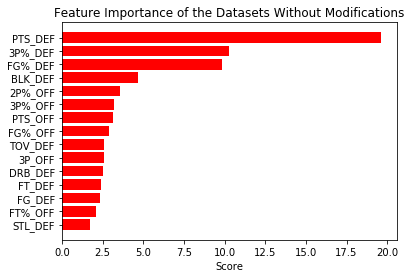

In [43]:
title = 'Feature Importance of the Datasets Without Modifications'
train_data = pd.read_csv('datasets/train_data_original.csv')
test_data = pd.read_csv('datasets/test_data_original.csv')
train_data.drop(['Team', 'Rk_DEF', 'Rk_OFF'], axis=1, inplace=True)
test_data.drop(['Team', 'Rk_DEF', 'Rk_OFF'], axis=1, inplace=True)
model = CatBoostClassifier(objective='Logloss', random_state=15000, verbose=False)
preds = model_train_test_evaluate_loop(title, model, train_data, test_data)

### Test Set 1: Transformed Teams

Model Performance on Training Data -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 3.0ms
Model Performance on Testing Data -- 	Accuracy: 0.833 / Precision: 0.933 / Recall: 0.778 / Latency: 42.0ms


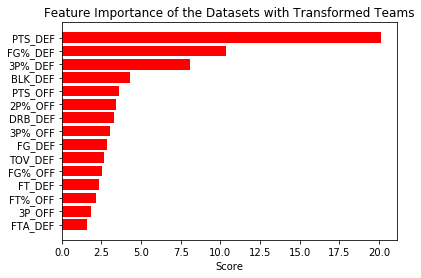

In [44]:
title = 'Feature Importance of the Datasets with Transformed Teams'
train_data = pd.read_csv('datasets/train_data_transformed_teams.csv')
test_data = pd.read_csv('datasets/test_data_transformed_teams.csv')
model = CatBoostClassifier(objective='Logloss', random_state=15000, verbose=False)
preds = model_train_test_evaluate_loop(title, model, train_data, test_data)

### Test Set 2: Ratios Only

Model Performance on Training Data -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
Model Performance on Testing Data -- 	Accuracy: 0.833 / Precision: 0.933 / Recall: 0.778 / Latency: 2.0ms


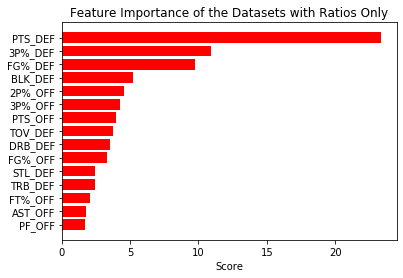

In [45]:
title = 'Feature Importance of the Datasets with Ratios Only'
train_data = pd.read_csv('datasets/train_data_ratios.csv')
test_data = pd.read_csv('datasets/test_data_ratios.csv')
model = CatBoostClassifier(objective='Logloss', random_state=15000, verbose=False)
preds = model_train_test_evaluate_loop(title, model, train_data, test_data)

### Test Set 3: Counts Only

Model Performance on Training Data -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
Model Performance on Testing Data -- 	Accuracy: 0.733 / Precision: 0.812 / Recall: 0.722 / Latency: 2.0ms


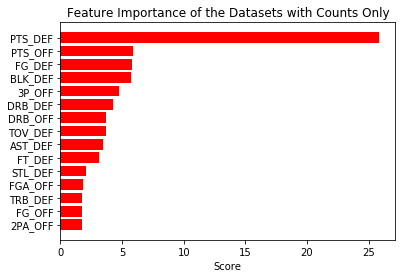

In [46]:
title = 'Feature Importance of the Datasets with Counts Only'
train_data = pd.read_csv('datasets/train_data_counts.csv')
test_data = pd.read_csv('datasets/test_data_counts.csv')
model = CatBoostClassifier(objective='Logloss', random_state=15000, verbose=False)
preds = model_train_test_evaluate_loop(title, model, train_data, test_data)

### Test Set 4: Averaged Similar Features

Model Performance on Training Data -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
Model Performance on Testing Data -- 	Accuracy: 0.6 / Precision: 0.75 / Recall: 0.5 / Latency: 2.0ms


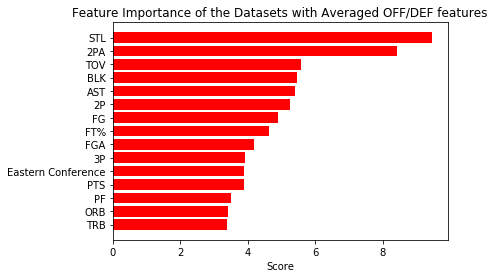

In [47]:
title = 'Feature Importance of the Datasets with Averaged OFF/DEF features'
train_data = pd.read_csv('datasets/train_data_avg_stats.csv')
test_data = pd.read_csv('datasets/test_data_avg_stats.csv')
model = CatBoostClassifier(objective='Logloss', random_state=15000, verbose=False)
preds = model_train_test_evaluate_loop(title, model, train_data, test_data)

### Test Set 5: Averaged Similar Features with Ratios Only

Model Performance on Training Data -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
Model Performance on Testing Data -- 	Accuracy: 0.6 / Precision: 0.75 / Recall: 0.5 / Latency: 2.0ms


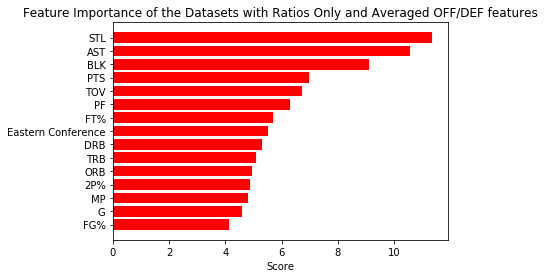

In [48]:
title = 'Feature Importance of the Datasets with Ratios Only and Averaged OFF/DEF features'
train_data = pd.read_csv('datasets/train_data_avg_ratios.csv')
test_data = pd.read_csv('datasets/test_data_avg_ratios.csv')
model = CatBoostClassifier(objective='Logloss', random_state=15000, verbose=False)
preds = model_train_test_evaluate_loop(title, model, train_data, test_data)

### Test Set 6: Averaged Similar Features with Counts Only

Model Performance on Training Data -- 	Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms
Model Performance on Testing Data -- 	Accuracy: 0.7 / Precision: 0.846 / Recall: 0.611 / Latency: 2.0ms


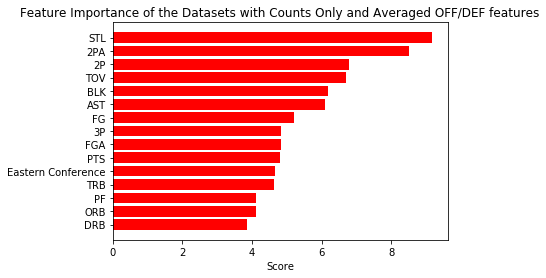

In [49]:
title = 'Feature Importance of the Datasets with Counts Only and Averaged OFF/DEF features'
train_data = pd.read_csv('datasets/train_data_avg_counts.csv')
test_data = pd.read_csv('datasets/test_data_avg_counts.csv')
model = CatBoostClassifier(objective='Logloss', random_state=15000, verbose=False)
preds = model_train_test_evaluate_loop(title, model, train_data, test_data)